#Input Handling and Data Preprocessing

##Importing the libraries

In [13]:
import numpy as np
import pandas as pd

##Importing the dataset


In [14]:
csv_path = 'isolated.csv'
# Ensure the file is uploaded in the folders section

##Reading the CSV files via calling the function

In [15]:
def read_csv(csv_path):
  np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
  path_XYs = []
  for i in np.unique(np_path_XYs[:, 0]):
    npXYs = np_path_XYs[np_path_XYs[:, 0] == i] [:, 1:]
    XYs = []
    for j in np.unique(npXYs[:, 0]):
      XY = npXYs[npXYs[:, 0] == j][:, 1:]
      XYs.append(XY)
    path_XYs.append(XYs)
  return path_XYs

shapes = read_csv(csv_path)
print(shapes)



[[array([[109.14299774, 125.58000183],
       [110.15747833, 125.49578094],
       [111.17194366, 125.40398407],
       [112.18638611, 125.30522156],
       [113.20079041, 125.20011139],
       [114.21517181, 125.08926392],
       [115.22950745, 124.97328949],
       [116.2437973 , 124.85279083],
       [117.25804138, 124.72838593],
       [118.27222443, 124.60068512],
       [119.28635406, 124.47029877],
       [120.30041504, 124.33782959],
       [121.31440735, 124.2039032 ],
       [122.32831573, 124.06912231],
       [123.34214783, 123.93410492],
       [124.355896  , 123.79945374],
       [125.36954498, 123.66577911],
       [126.38310242, 123.53369141],
       [127.39655304, 123.40380859],
       [128.40989685, 123.27674103],
       [129.42312622, 123.15309143],
       [130.43623352, 123.03347778],
       [131.44923401, 122.91851044],
       [132.46208191, 122.80879974],
       [133.47480774, 122.70494843],
       [134.48739624, 122.60758209],
       [135.49983215, 122.51730347],

##Visualizing the results

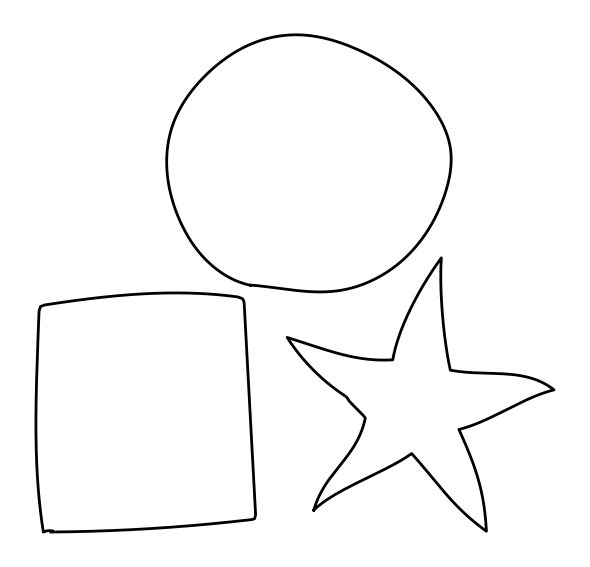

In [16]:
import matplotlib.pyplot as plt

# Plotting function with an option to save the plot and without axis points
def plot(paths_XYs, save_path=None):
    colours = ['black']
    fig, ax = plt.subplots(tight_layout=True, figsize=(6, 6))
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], color=c, linewidth=2)
    ax.set_aspect('equal')
    ax.axis('off')  # Turn off the axis

    if save_path:
        plt.savefig(save_path)  # Save the figure as a PNG file
    plt.show()

# Example usage: plot and save the shapes without axis points
plot(shapes, '/content/isolated.png')


##Visualizing shapes

##Converting polylines to PNG and SVG for further processing


In [17]:
import numpy as np

!pip install svgwrite
import svgwrite

!pip install cairosvg
import cairosvg

def polylines2svg(paths_XYs, svg_path):
    W, H = 0, 0
    colours = ['black']  # Define color palette

    # Calculate the maximum width and height for the canvas
    for path_XYs in paths_XYs:
        for XY in path_XYs:
            W, H = max(W, np.max(XY[:, 0])), max(H, np.max(XY[:, 1]))

    padding = 0.1
    W, H = int(W + padding * W), int(H + padding * H)

    # Create a new SVG drawing
    dwg = svgwrite.Drawing(svg_path, profile='tiny', shape_rendering='crispEdges')
    group = dwg.g()

    # Generate SVG path data
    for i, path in enumerate(paths_XYs):
        path_data = []
        c = colours[i % len(colours)]  # Cycle through colors for each path
        for XY in path:
            path_data.append(("M", (XY[0, 0], XY[0, 1])))  # Move to starting point
            for j in range(1, len(XY)):
                path_data.append(("L", (XY[j, 0], XY[j, 1])))  # Draw line to next point

        # Close path if start and end points are the same
        if not np.allclose(path[0], path[-1]):
            path_data.append(("Z", None))  # Close the path

        # Add path to group with specified color and no stroke
        group.add(dwg.path(d=" ".join(f"{cmd} {','.join(map(str, coords))}" if coords else cmd for cmd, coords in path_data), fill=c, stroke='none', stroke_width=2))

    # Add group to drawing and save
    dwg.add(group)
    dwg.save()

    # Convert SVG to PNG using cairosvg
    png_path = svg_path.replace('.svg', '.png')
    factor = max(1, 1024 // min(H, W))  # Ensure a minimum size for readability
    cairosvg.svg2png(url=svg_path, write_to=png_path, parent_width=W, parent_height=H, output_width=factor * W, output_height=factor * H, background_color='white')

    return

polylines2svg(shapes, '/content/polylines_output.svg')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 1.9 MB/s eta 0:00:00
ERROR: Operation cancelled by user


ModuleNotFoundError: No module named 'svgwrite'

#Shape Segmentation

[array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 

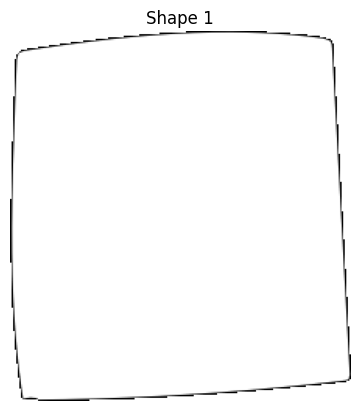

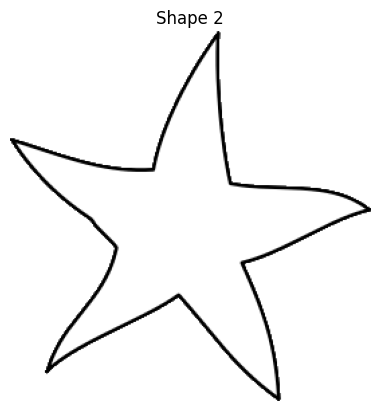

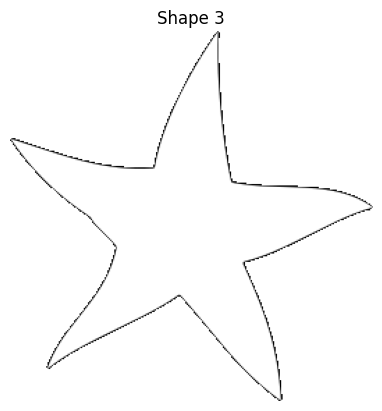

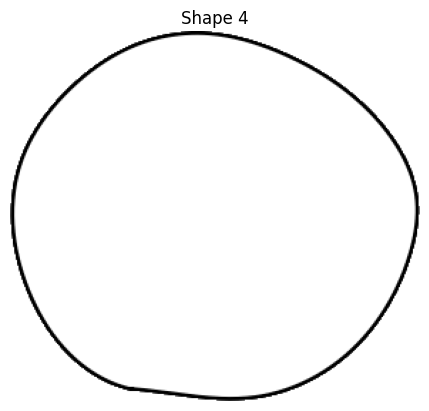

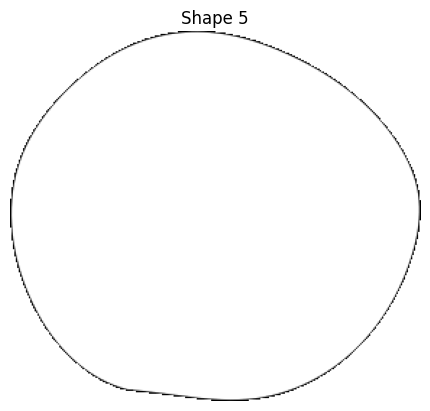

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_and_store_isolated_shapes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    isolated_shapes = []  # List to store each isolated shape

    for contour in contours[1:]:  # Skip the first contour as it's the entire image
        mask = np.zeros_like(gray)
        cv2.drawContours(mask, [contour], -1, 255, -1)
        segmented_shape = np.zeros_like(gray)
        segmented_shape[mask == 255] = gray[mask == 255]
        x, y, w, h = cv2.boundingRect(contour)
        cropped = segmented_shape[y:y+h, x:x+w]
        isolated = np.full((h, w), 255, dtype=np.uint8)
        isolated[mask[y:y+h, x:x+w] == 255] = cropped[mask[y:y+h, x:x+w] == 255]
        isolated_shapes.append(isolated)  # Append the isolated shape to the list

    return isolated_shapes

# Example Usage
image_path = 'isolated.png'
isolated_shapes = segment_and_store_isolated_shapes(image_path)
print(isolated_shapes)

# You can access any isolated shape like this:
for idx, shape in enumerate(isolated_shapes, start=1):
    plt.imshow(shape, cmap='gray')
    plt.title(f'Shape {idx}')
    plt.axis('off')
    plt.show()


#Shape Identification

Uses weight file from pretrained CNN model with 99.26& accuracy, refer to Shape_Identification notebook for detailed insights on how the model was trained

###Download pretained weights (.h5) model file from the public Github repository

In [20]:
!wget 'https://raw.githubusercontent.com/thejediboySHASHANK/Google-Doodle-Classes/main/keras.h5'

--2024-08-12 10:54:12--  https://raw.githubusercontent.com/thejediboySHASHANK/Google-Doodle-Classes/main/keras.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1225792 (1.2M) [application/octet-stream]
Saving to: ‘keras.h5.1’

keras.h5.1          100%[===================>]   1.17M  --.-KB/s    in 0.06s   

2024-08-12 10:54:12 (18.4 MB/s) - ‘keras.h5.1’ saved [1225792/1225792]



###Load Classes file from public Github repositories

In [21]:
!wget 'https://raw.githubusercontent.com/thejediboySHASHANK/Google-Doodle-Classes/main/mini_classes.txt'

--2024-08-12 10:54:14--  https://raw.githubusercontent.com/thejediboySHASHANK/Google-Doodle-Classes/main/mini_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66 [text/plain]
Saving to: ‘mini_classes.txt.1’

mini_classes.txt.1  100%[===================>]      66  --.-KB/s    in 0s      

2024-08-12 10:54:14 (1.29 MB/s) - ‘mini_classes.txt.1’ saved [66/66]



###Read the Classes Name

In [22]:
f = open("mini_classes.txt", "r")
#And for the purpose of reading
classes = f.readlines()
f.close()

In [23]:
classes = [c.replace('\n', '').replace(' ', '_') for c in classes]

print(classes)

['circle', 'hexagon', 'line', 'octagon', 'square', 'star', 'triangle', 'suitcase']


In [24]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

class_names = []
# Append the new classes
class_names.extend(classes)

print(class_names)

def prepare_custom_image(image_path, image_size=28):
    # Load the image
    img = Image.open(image_path).convert('L')  # Convert to grayscale

    # Resize image
    img = img.resize((image_size, image_size), Image.ANTIALIAS)

    # Convert to numpy array and normalize
    img_array = np.array(img, dtype=np.float32) / 255.0

    # Invert the image to match training data style
    img_array = 1 - img_array  # Subtract from 1 to invert the grayscale values

    # Reshape the array to fit the model input
    img_array = img_array.reshape(1, image_size, image_size, 1)

    return img_array

# Path to your custom image and model
image_path = 'star.png'
model_path = 'keras.h5'

# Load the model
model = keras.models.load_model(model_path)

# Prepare the image
custom_img = prepare_custom_image(image_path)

# Display the processed image
plt.imshow(custom_img.reshape(28, 28), cmap='gray')
plt.title("Processed Custom Image")
plt.axis('off')
plt.show()

# from PIL import Image
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow import keras

# # Assuming class_names is already defined and populated correctly as shown in previous responses
# class_names = []
# # Append the new classes
# class_names.extend(classes)

# def prepare_image_for_model(image, image_size=28):
#     # Convert image to grayscale and resize
#     img = Image.fromarray(image).convert('L')
#     img = img.resize((image_size, image_size), Image.ANTIALIAS)

#     # Convert to numpy array and normalize
#     img_array = np.array(img, dtype=np.float32) / 255.0

#     # Invert the image to match training data style
#     img_array = 1 - img_array  # Subtract from 1 to invert the grayscale values

#     # Reshape the array to fit the model input
#     img_array = img_array.reshape(1, image_size, image_size, 1)

#     return img_array

# model_path = 'keras.h5'
# model = keras.models.load_model(model_path)

###Predicting the Custom Image shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


<ipython-input-24-9b654826d131>:59: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((image_size, image_size), Image.ANTIALIAS)


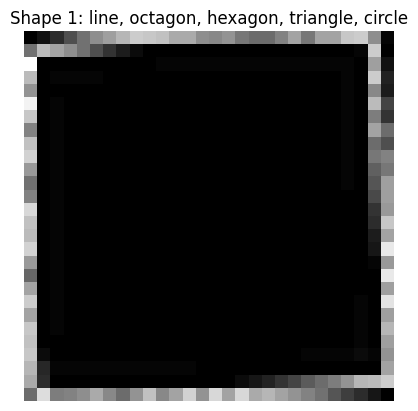

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


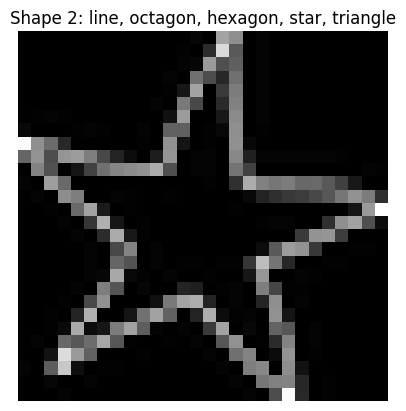

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


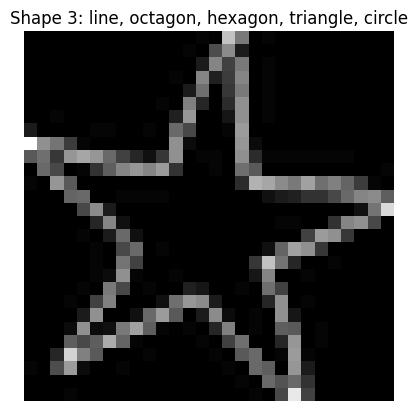

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


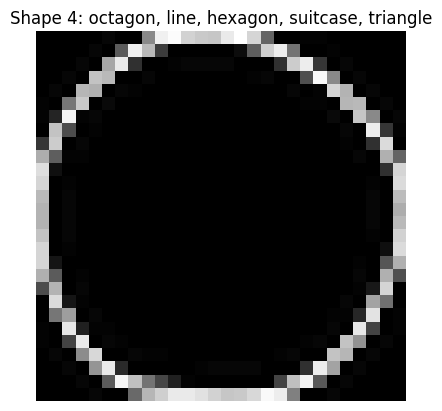

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


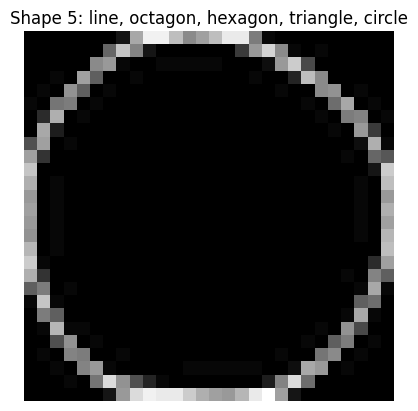

Shape 1: ['line', 'octagon', 'hexagon', 'triangle', 'circle']
Shape 2: ['line', 'octagon', 'hexagon', 'star', 'triangle']
Shape 3: ['line', 'octagon', 'hexagon', 'triangle', 'circle']
Shape 4: ['octagon', 'line', 'hexagon', 'suitcase', 'triangle']
Shape 5: ['line', 'octagon', 'hexagon', 'triangle', 'circle']


In [25]:
# Corrected prediction call
pred = model.predict(custom_img)[0]
ind = (-pred).argsort()[:5]
latex = [class_names[x] for x in ind]
print(latex)


# predictions = []
# for i, shape in enumerate(isolated_shapes):
#     processed_img = prepare_image_for_model(shape)
#     pred = model.predict(processed_img)[0]
#     ind = (-pred).argsort()[:5]
#     predicted_labels = [class_names[x] for x in ind]
#     predictions.append(predicted_labels)

#     # Plot the image that was input to the model
#     plt.imshow(processed_img.reshape(28, 28), cmap='gray')
#     plt.title(f"Shape {i+1}: {', '.join(predicted_labels)}")
#     plt.axis('off')
#     plt.show()

# # Print out predictions for verification
# for idx, pred in enumerate(predictions, 1):
#     print(f"Shape {idx}: {pred}")

#Shape Symmetry Identification